### Mercedes-Benz Greener Manufacturing

#### Reduce the time a Mercedes-Benz spends on the test bench.

**Problem Statement Scenario**
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

**You are required to reduce the time that cars spend on the test bench.** Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

**Steps to follow**
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets.
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using XGBoost.


<img src="https://www.simplilearn.com/ice9/new_logo.svgz">

<img src="https://cdn.carbuzz.com/gallery-images/840x560/693000/900/693985.jpg">

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

#### Import Dataset

In [2]:
df = pd.read_csv('mercbenz/train.csv')

df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


### Exploratory Data Analysis

In [4]:
y = df['y'].values

Text(0, 0.5, '# of times')

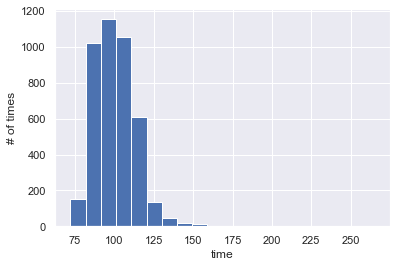

In [5]:
plt.figure('figsize=(15,6)')
plt.hist(y,bins=20)
plt.xlabel('time')
plt.ylabel('# of times')

1. Distribution appears to be normal and centered around mean.
2. A few outliers with values beyond 250s are also appearing.

#### Checking whether it is a time series

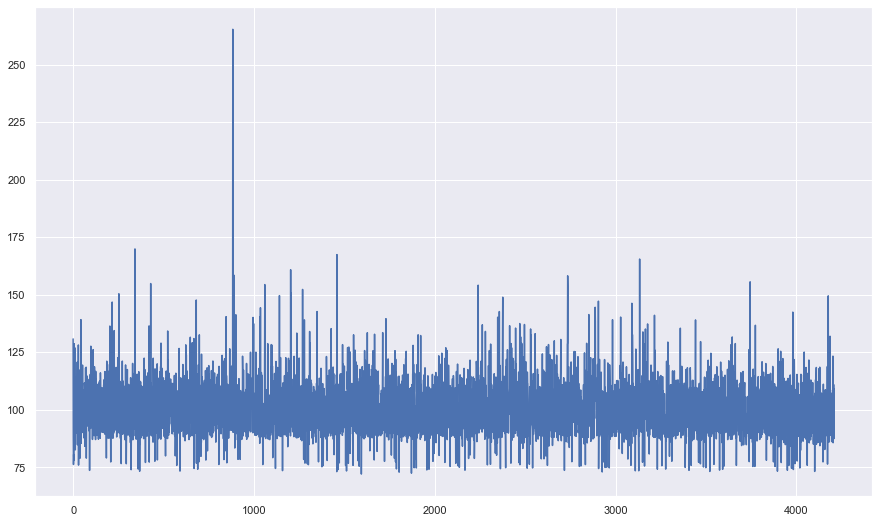

In [6]:
plt.figure(figsize=(15,9))
plt.plot(y);

1. No pattern, trend - series is stationary.
2. The target variable doesn't show any characteristic of time series.

#### Feature Analysis

In [7]:
cols = [c for c in df.columns if 'X' in c]

print(f'Number of features: {len(cols)}')

print(f'\n\nFeature Types : \n{df[cols].dtypes.value_counts()}')

Number of features: 376


Feature Types : 
int64     368
object      8
dtype: int64


#### Find Cardinality

1. Create a list of 3 lists, call it cols

2. Iterate over columns

3. In Iterator:
    * find the type of columns
    * find # of unique values
    * if # of unique values = 1, assign it to cols[0]
    * if # of unique values = 2 and if the type is numeric, assign it to cols[1]
    * else assign it to cols[2]

In [11]:
cnt = [[],[],[]]

for c in cols:
    typev = df[c].dtypes
    #print(f'typev - {c} ---> {typev}')
    unique = len(np.unique(df[c]))
    
    if unique==1: cnt[0].append(c)
    elif unique==2 and typev==np.int64: cnt[1].append(c)
    else: cnt[2].append(c)
        

In [13]:
print(f'Constant Features: {cnt[0]} \n\nBinary Features: {cnt[1]} \n\nCategorical Features: {cnt[2]}')

Constant Features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'] 

Binary Features: ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 

In [15]:
dft = pd.read_csv('mercbenz/test.csv')

features = list(set(df.columns)-set(['ID','y']))

In [16]:
X_train = df[features]
y_train = df['y'].values

X_test = dft[features]

id_test = df['ID'].values

In [17]:
for col in features:
    cardinality = len(np.unique(X_train[col]))
    
    # Dropping constant variance columns
    if cardinality==1:
        X_train.drop(col,axis=1)
        X_test.drop(col,axis=1)
        
    # Performing Label encoding of categorical columns
    if cardinality>2:
        mapper = lambda x: sum(ord(digit) for digit in x)
        
        X_train[col] = X_train[col].apply(mapper)
        X_test[col] = X_test[col].apply(mapper)

<ipython-input-17-93717e41713c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].apply(mapper)
<ipython-input-17-93717e41713c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].apply(mapper)


In [19]:
X_train['X0'].head()

0    107
1    107
2    219
3    219
4    219
Name: X0, dtype: int64

In [20]:
df['X0'].head()

0     k
1     k
2    az
3    az
4    az
Name: X0, dtype: object